# Project ARI3205 Interpretable AI for Deep Learning Models *(Part 1.1)*
---

**Name:** Andrea Filiberto Lucas  
**ID No:** 0279704L

---

## Importing Necessary Libraries

In [1]:
import json

# Read the libraries from the text file
with open('../Libraries/Part1_Lib.json', 'r') as file:
    libraries = json.load(file)

# ANSI escape codes for colored output
GREEN = "\033[92m"  # Green text
RED = "\033[91m"    # Red text
RESET = "\033[0m"   # Reset to default color

# Function to check and install libraries
def check_and_install_libraries(libraries):
    for lib, import_name in libraries.items():
        try:
            # Attempt to import the library
            __import__(import_name)
            print(f"[{GREEN}✔{RESET}] Library '{lib}' is already installed.")
        except ImportError:
            # If import fails, try to install the library
            print(f"[{RED}✖{RESET}] Library '{lib}' is not installed. Installing...")
            %pip install {lib}

# Execute the function to check and install libraries
check_and_install_libraries(libraries)

# Import necessary libraries for data analysis and modeling
import pandas as pd                                                                 # Data manipulation and analysis                #type: ignore
import numpy as np                                                                  # Numerical computations                        #type: ignore
import matplotlib.pyplot as plt                                                     # Data visualization                            #type: ignore
import seaborn as sns                                                               # Statistical data visualization                #type: ignore
import statsmodels.formula.api as smf                                               # Statistical models                            #type: ignore
from sklearn.model_selection import train_test_split                                # Train-test split                              #type: ignore
from tensorflow.keras.models import Sequential                                      # Neural network model                          #type: ignore
from tensorflow.keras.layers import Dense                                           # Neural network layers                         #type: ignore                                                               
from tensorflow.keras.optimizers import Adam                                        # Neural network optimizer                      #type: ignore
from sklearn.preprocessing import StandardScaler                                    # Data scaling                                  #type: ignore
from sklearn.impute import SimpleImputer                                            # Missing value imputation                      #type: ignore
from sklearn.inspection import PartialDependenceDisplay, permutation_importance     # Feature importance                            #type: ignore
from sklearn.neural_network import MLPRegressor                                     # Neural network model                          #type: ignore
from sklearn.metrics import mean_squared_error                                      # Model evaluation                              #type: ignore
from alibi.explainers import ALE, plot_ale                                          # ALE plots                                     #type: ignore

# Suppress specific warnings
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

[✔] Library 'tensorflow' is already installed.
[✔] Library 'scikit-learn' is already installed.
[✔] Library 'matplotlib' is already installed.
[✔] Library 'seaborn' is already installed.
[✔] Library 'pandas' is already installed.
[✔] Library 'numpy' is already installed.
[✔] Library 'scipy' is already installed.
[✔] Library 'alibi' is already installed.


## General Information on Boston Housing Dataset

*https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data*

In [2]:
# Define the filename
filename = '../Datasets/Boston/Boston.csv'

# Load the dataset
try:
    boston_data = pd.read_csv(filename)
    print(f"'{filename}' dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{filename}' was not found. Please ensure it is in the correct directory.")
    exit()
except pd.errors.EmptyDataError:
    print(f"Error: The file '{filename}' is empty.")
    exit()
except pd.errors.ParserError:
    print(f"Error: There was a problem parsing '{filename}'. Please check the file format.")
    exit()

# Dataset insights
print("\nDataset Overview:")
print(boston_data.info())
print("\nStatistical Summary:")
print(boston_data.describe())

'../Datasets/Boston/Boston.csv' dataset loaded successfully.

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Statistical Summary:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.

## Feed-Forward Neural Network

In [3]:
# Separate features and target
X = boston_data.drop(columns=['MEDV'])  # Features
y = boston_data['MEDV']  # Target

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (404, 13)
Test data shape: (102, 13)


In [4]:
# Build the feed-forward neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 645.2300 - mae: 23.4115 - val_loss: 524.8203 - val_mae: 21.4135
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 574.2705 - mae: 21.9858 - val_loss: 497.6118 - val_mae: 20.7998
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 536.5518 - mae: 21.2740 - val_loss: 461.5500 - val_mae: 19.9766
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 497.8069 - mae: 20.2422 - val_loss: 413.4614 - val_mae: 18.8347
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 429.4543 - mae: 18.9435 - val_loss: 352.3260 - val_mae: 17.2758
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 379.2853 - mae: 17.4573 - val_loss: 282.6457 - val_mae: 15.2887
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 289.0721 - mae: 15.0384 - val_loss: 210.0639 - val_mae: 12.9400
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208.8056 - mae: 12.2309 - val_loss: 141.5309 - val_mae: 10.2660
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━

## Surrogate Model - MLPRegressor

In [5]:
# Train an MLPRegressor as a surrogate model
surrogate_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
surrogate_model.fit(X_train, y_train)

# Evaluate the surrogate model
y_pred = surrogate_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Surrogate Model Mean Squared Error: {mse:.4f}")

Surrogate Model Mean Squared Error: 12.7475


## Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) plots

In [6]:
# Partial Dependence Plots (PDP)
def plot_pdp(features):
    print("\nGenerating PDP for features:", features)
    fig, ax = plt.subplots(1, len(features), figsize=(12, 6), constrained_layout=True)
    for i, feature in enumerate(features):
        PartialDependenceDisplay.from_estimator(
            surrogate_model,  # The trained surrogate model (MLPRegressor)
            X_train,          # Training data
            features=[feature],  # Single feature for PDP
            kind="average",   # PDP only
            ax=ax[i] if len(features) > 1 else ax,
            grid_resolution=50,
        )
        ax[i].set_title(f"PDP for {feature}")
    plt.show()

In [7]:
# Individual Conditional Expectation (ICE) Plots
def plot_ice(features):
    print("\nGenerating ICE for features:", features)
    fig, ax = plt.subplots(1, len(features), figsize=(12, 6), constrained_layout=True)
    for i, feature in enumerate(features):
        PartialDependenceDisplay.from_estimator(
            surrogate_model,  # The trained surrogate model (MLPRegressor)
            X_train,          # Training data
            features=[feature],  # Single feature for ICE
            kind="both",      # PDP and ICE
            ax=ax[i] if len(features) > 1 else ax,
            grid_resolution=50,
        )
        ax[i].set_title(f"ICE and PDP for {feature}")
    plt.show()

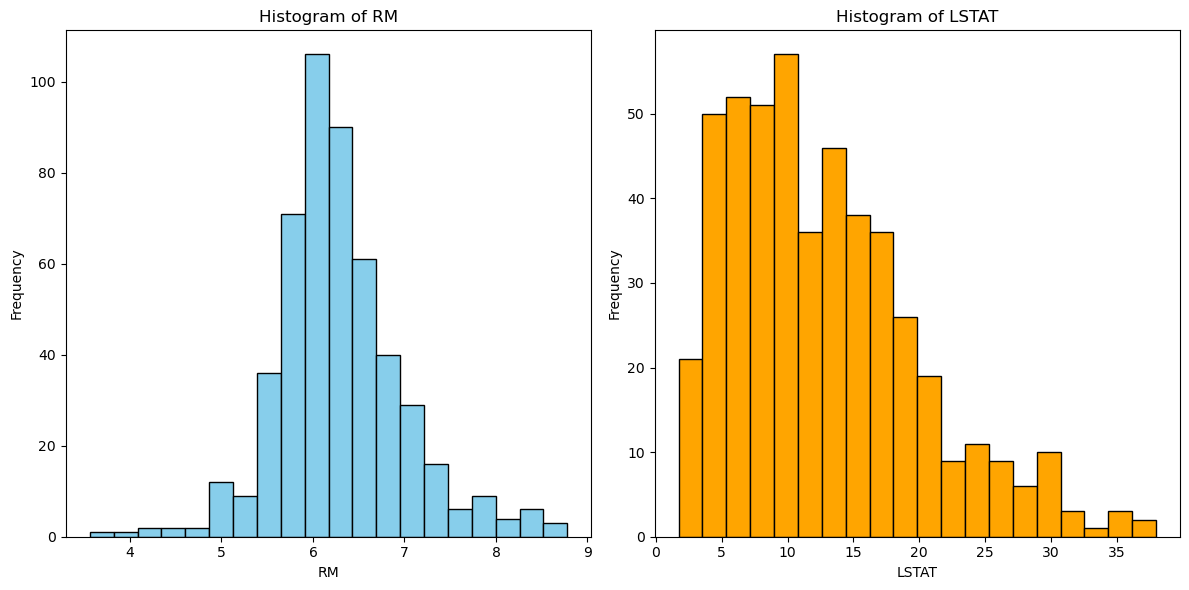


Generating PDP for features: ['RM', 'LSTAT']


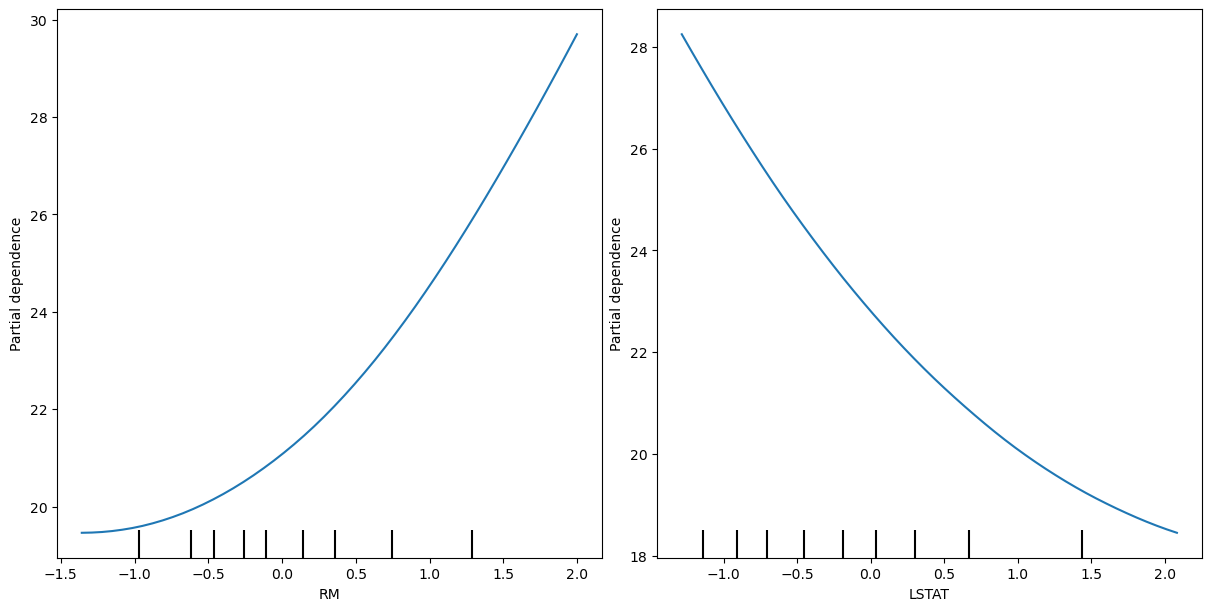


Generating ICE for features: ['RM', 'LSTAT']


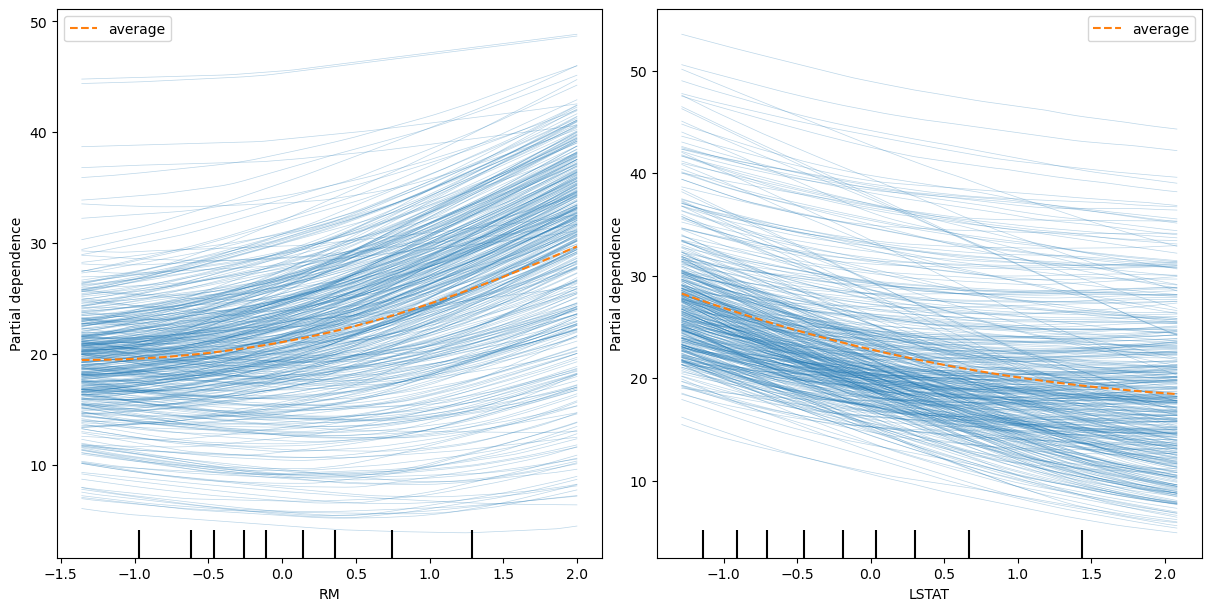

In [8]:
# Call PDP and ICE plot functions
features_to_analyze = ['RM', 'LSTAT']

# Plot histograms for features_to_analyze
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_analyze):
    plt.subplot(1, len(features_to_analyze), i + 1)
    plt.hist(boston_data[feature], bins=20, edgecolor='black', color='skyblue' if i % 2 == 0 else 'orange')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plot_pdp(features_to_analyze)
plot_ice(features_to_analyze)

## Permutation Feature Importance (PFI)

In [9]:
# Compute Permutation Feature Importance
def compute_pfi(model, X_test, y_test, feature_names):
    pfi_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
    
    # Convert PFI results into a DataFrame for better visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': pfi_result.importances_mean,
        'Std': pfi_result.importances_std
    })

    # Sort features by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print("\nPermutation Feature Importance:\n", importance_df)
    return importance_df

In [10]:
# Plot Permutation Feature Importance as a Boxplot
def plot_pfi(model, X, y, feature_names):
    result = permutation_importance(model, X, y, scoring='neg_mean_squared_error', n_repeats=10, random_state=42, n_jobs=2)

    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(result.importances[sorted_importances_idx].T,
                               columns=[feature_names[i] for i in sorted_importances_idx])

    ax = importances.plot.box(vert=False, whis=10, figsize=(12, 8), color=dict(boxes="blue", whiskers="black", medians="green", caps="black"))
    ax.axvline(x=0, color="k", linestyle="--")

    # Add faint grey lines across the graph for each feature
    for i in range(len(importances.columns)):
        plt.axhline(y=i + 1, color="grey", linestyle="-", linewidth=0.5, alpha=0.5)

    # Add faint grey lines upwards from the x-axis ticks
    xticks = ax.get_xticks()
    for tick in xticks:
        plt.axvline(x=tick, color="grey", linestyle="-", linewidth=0.5, alpha=0.5)

    # Set the x-axis limits
    ax.set_xlim(left=0 - 0.05 * (ax.get_xlim()[1] - 0))

    ax.set_xlabel("Decrease in Score")
    ax.set_ylabel("Feature")
    ax.set_title("Permutation Feature Importance")
    plt.tight_layout()
    plt.show()


Permutation Feature Importance:
     Feature  Importance       Std
12    LSTAT   24.594452  4.819524
5        RM   23.492247  2.306411
4       NOX   14.488889  2.533761
8       RAD   13.979112  3.490214
0      CRIM   13.408561  2.758039
7       DIS   12.747733  2.383452
9       TAX    5.263374  0.893353
10  PTRATIO    4.990779  0.644088
6       AGE    2.380155  0.586128
3      CHAS    2.149071  1.070397
11        B    1.384748  1.012892
1        ZN    1.331404  1.110311
2     INDUS    0.470038  0.717250


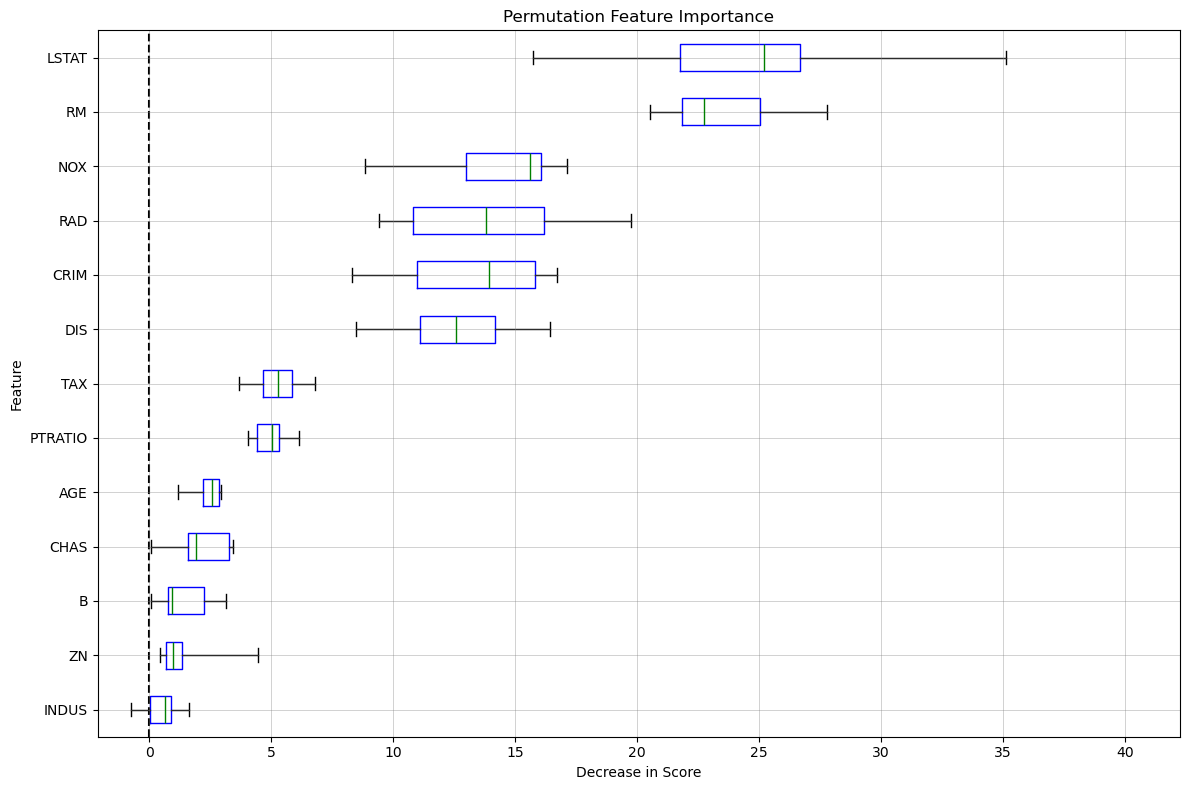

In [11]:
feature_names = X_test.columns 
importance_df = compute_pfi(surrogate_model, X_test, y_test, feature_names)
plot_pfi(surrogate_model, X_test, y_test, feature_names)

## Accumulated Local Effects (ALE)

In [12]:
# Combine features and target for context if needed
data = pd.concat([X_train, y_train], axis=1)
# Define feature names
feature_names = X_train.columns

# Ensure valid input for ALE explainer
X_train_array = X_train.to_numpy()  # Convert to NumPy array to avoid warnings

# Create and compute ALE explainer
ale_explainer = ALE(surrogate_model.predict, feature_names=feature_names)
ale_explanation = ale_explainer.explain(X_train_array)

array([[<Axes: xlabel='CRIM', ylabel='ALE'>,
        <Axes: xlabel='ZN', ylabel='ALE'>,
        <Axes: xlabel='INDUS', ylabel='ALE'>,
        <Axes: xlabel='CHAS', ylabel='ALE'>],
       [<Axes: xlabel='NOX', ylabel='ALE'>,
        <Axes: xlabel='RM', ylabel='ALE'>,
        <Axes: xlabel='AGE', ylabel='ALE'>,
        <Axes: xlabel='DIS', ylabel='ALE'>],
       [<Axes: xlabel='RAD', ylabel='ALE'>,
        <Axes: xlabel='TAX', ylabel='ALE'>,
        <Axes: xlabel='PTRATIO', ylabel='ALE'>,
        <Axes: xlabel='B', ylabel='ALE'>],
       [<Axes: xlabel='LSTAT', ylabel='ALE'>, None, None, None]],
      dtype=object)

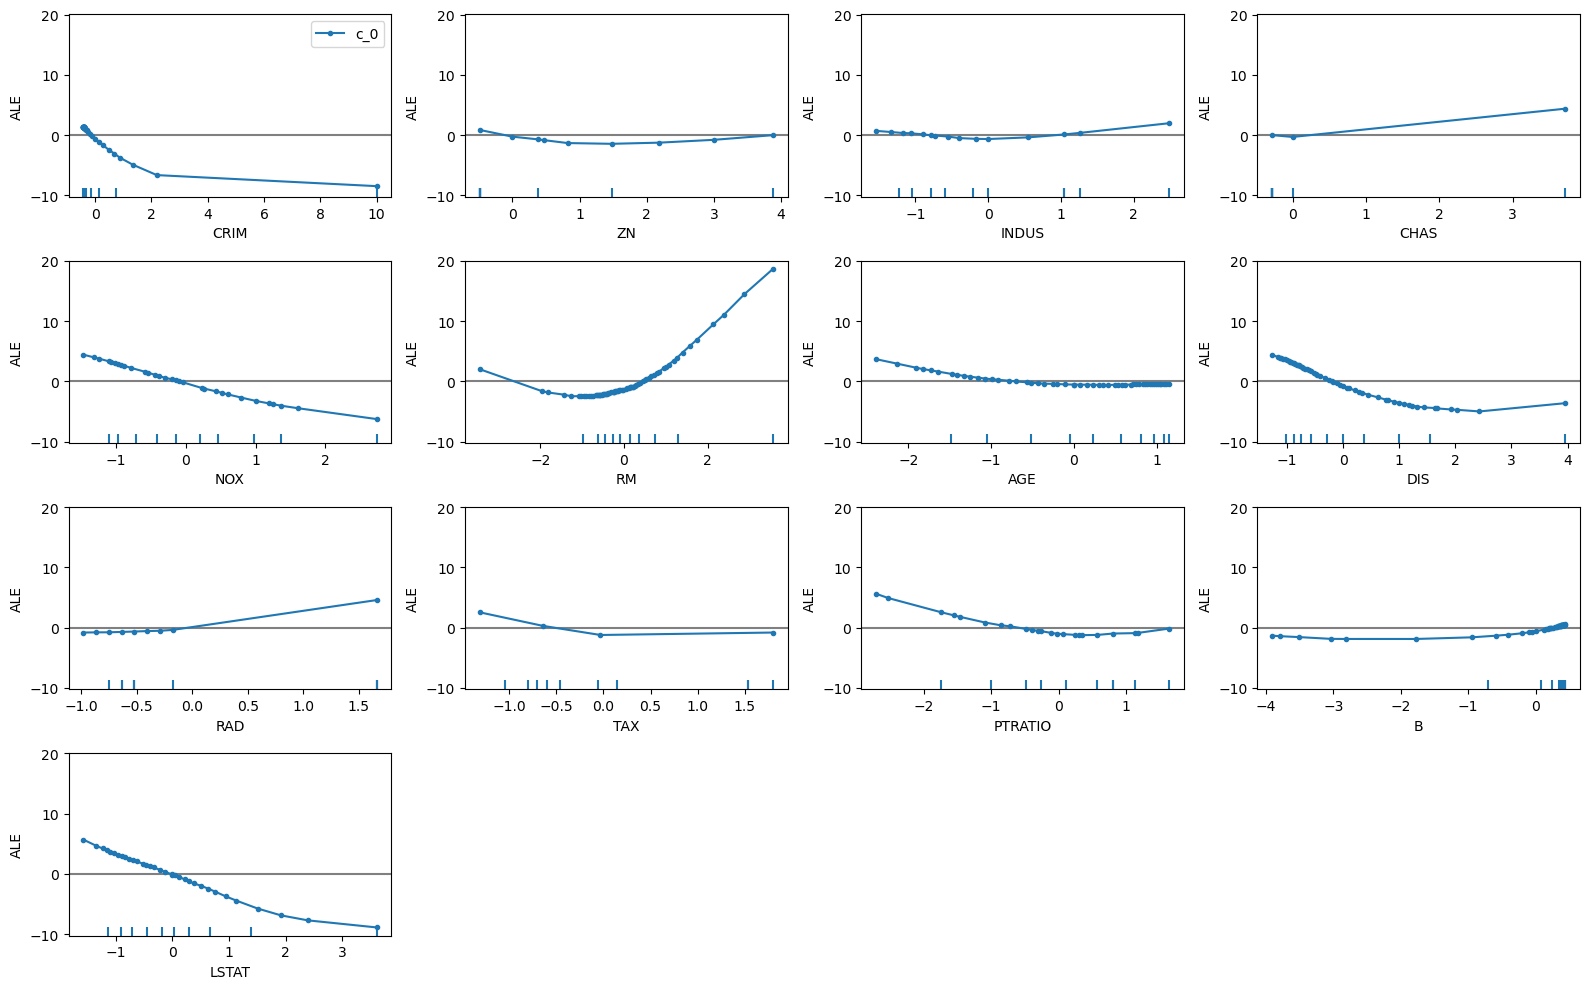

In [13]:
# Plot ALE for all features
plot_ale(
    ale_explanation,
    features=feature_names.tolist(),  # Automatically include all features
    # features=['RM', 'LSTAT'], # Select specific features
    n_cols=4,  # Arrange plots in 4 columns for better visualization
    fig_kw={'figwidth': 16, 'figheight': 10}  # Adjust figure size for clarity
)

## Global Surrogates

In [14]:
# Generate predictions from the neural network
NN_labels = model.predict(X_train).flatten() 
X_train['NN_labels'] = NN_labels

# Train an interpretable linear regression model
formula = 'NN_labels ~ ' + ' + '.join(X_train.columns[:-1])  # Include all features in the formula
lin_reg = smf.ols(formula=formula, data=X_train).fit()
print(lin_reg.summary())

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
                            OLS Regression Results                            
Dep. Variable:              NN_labels   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     179.0
Date:                Mon, 06 Jan 2025   Prob (F-statistic):          2.57e-155
Time:                        20:04:01   Log-Likelihood:                -1054.0
No. Observations:                 404   AIC:                             2136.
Df Residuals:                     390   BIC:                             2192.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

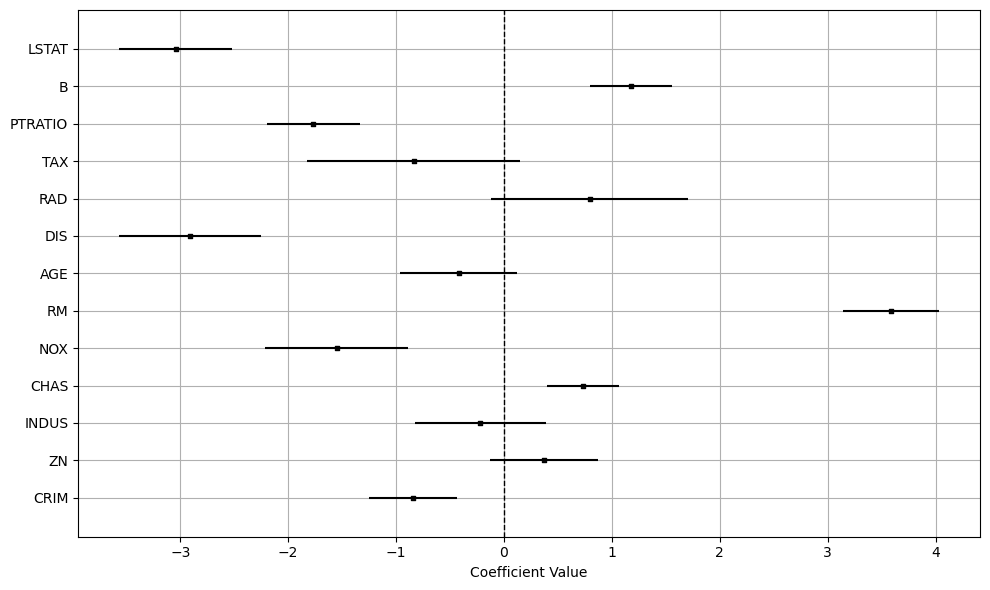

In [15]:
# Extract coefficients and confidence intervals
err_series = lin_reg.params - lin_reg.conf_int()[0]
coef_df = pd.DataFrame({
    'coef': pd.to_numeric(lin_reg.params.values[1:], errors='coerce'),
    'err': pd.to_numeric(err_series.values[1:], errors='coerce'),
    'varname': err_series.index.values[1:]
})

# Visualize the coefficients and confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(coef_df['varname'], coef_df['coef'], xerr=coef_df['err'], color='none', edgecolor=None)
ax.scatter(y=coef_df['varname'], x=coef_df['coef'], marker='s', s=10, color='black')
ax.axvline(x=0, linestyle='--', color='black', linewidth=1)

ax.set_xlabel('Coefficient Value')
ax.set_ylabel('')
ax.grid(True)

plt.tight_layout()
plt.show()
